Angothu Muni@21cs002361

This working is a Python script designed to perform natural language processing tasks using deep 
learning techniques. It begins by loading the libraries and ignoring warning messages to ensure a clean output and for The numerical operations, data manipulation, and deep learning, such 
as NumPy, Pandas, TensorFlow, and Keras. Specifically, it imports modules from Keras, a highlevel neural networks API, to build a sophisticated neural network model. The model includes 
layers like LSTM (Long Short-Term Memory) and Bidirectional, which are widely used in natural 
language processing tasks. Additionally, the script utilizes tools from the string manipulation 
and text processing libraries, such as string, nltk, and re, for cleaning and preprocessing textual 
data. The configuration settings for Pandas are adjusted to display a larger number of rows and 
columns for better visibility in the output. Overall, this code provides the 

In [4]:
#loading the Libraries

In [ ]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import seaborn as sns
import pandas as pd
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
import spacy
import nltk

the line nlp=spacy.load('en_core_web_sm') loads a small English language processing model provided by SpaCy, making it ready to be used for various NLP tasks like tokenization, part-of-speech tagging, named entity recognition, dependency parsing, and more.

In [2]:
nlp=spacy.load('en_core_web_sm')

this function is a convenient way to read the contents of a file into a list of strings, with leading and trailing whitespaces removed from each line.


In [3]:
def read_file(file_path):
    with open(file_path, encoding='utf-8') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
    return lines

After running this code, english_sentences will be a list containing English sentences read from the file 'IITB.en-hi.en', and hindi_sentences will be a list containing Hindi sentences read from the file 'IITB.en-hi.hi'. Each list element will correspond to one sentence from the respective file.


In [4]:
# Reading English and Hindi sentences
english_sentences = read_file('IITB.en-hi.en')
hindi_sentences = read_file('IITB.en-hi.hi')

english_sentences will be a list containing English sentences read from the file 'IITB.en-hi.en', and hindi_sentences will be a list containing Hindi sentences read from the file 'IITB.en-hi.hi'. Each element in these lists will correspond to one sentence from the respective file, with leading and trailing whitespaces removed.

You can then use these lists for further processing or analysis, such as translation tasks or any other NLP-related tasks you might have.


In [5]:
# Limititing the number of sentences for quicker EDA
english_sentences = english_sentences[:10000]
hindi_sentences = hindi_sentences[:10000]

The provided code tokenizes the English and Hindi sentences stored in the english_sentences and hindi_sentences lists, respectively, using the word_tokenize function. It then prints the tokens of the first five sentences for both languages.



In [6]:
# Tokenizing the sentences
english_tokens = [word_tokenize(sentence) for sentence in english_sentences]
hindi_tokens = [word_tokenize(sentence) for sentence in hindi_sentences]
print("English Tokens:", english_tokens[:5])
print("Hindi Tokens:", hindi_tokens[:5]) 

English Tokens: [['Give', 'your', 'application', 'an', 'accessibility', 'workout'], ['Accerciser', 'Accessibility', 'Explorer'], ['The', 'default', 'plugin', 'layout', 'for', 'the', 'bottom', 'panel'], ['The', 'default', 'plugin', 'layout', 'for', 'the', 'top', 'panel'], ['A', 'list', 'of', 'plugins', 'that', 'are', 'disabled', 'by', 'default']]
Hindi Tokens: [['अपने', 'अनुप्रयोग', 'को', 'पहुंचनीयता', 'व्यायाम', 'का', 'लाभ', 'दें'], ['एक्सेर्साइसर', 'पहुंचनीयता', 'अन्वेषक'], ['निचले', 'पटल', 'के', 'लिए', 'डिफोल्ट', 'प्लग-इन', 'खाका'], ['ऊपरी', 'पटल', 'के', 'लिए', 'डिफोल्ट', 'प्लग-इन', 'खाका'], ['उन', 'प्लग-इनों', 'की', 'सूची', 'जिन्हें', 'डिफोल्ट', 'रूप', 'से', 'निष्क्रिय', 'किया', 'गया', 'है']]



The provided code calculates the lengths of tokenized sentences in terms of the number of tokens for both English and Hindi sentences. Then, it prints the lengths of the first five sentences for each language.

In [7]:
# Analyzing sentence lengths
english_lengths = [len(tokens) for tokens in english_tokens]
hindi_lengths = [len(tokens) for tokens in hindi_tokens]
print("English Sentence Lengths:", english_lengths[:5])
print("Hindi Sentence Lengths:", hindi_lengths[:5])

English Sentence Lengths: [6, 3, 8, 8, 9]
Hindi Sentence Lengths: [8, 3, 7, 7, 12]


The provided code utilizes the seaborn library to create a histogram plot to visualize the distribution of sentence lengths for both English and Hindi sentences.This code will generate a histogram plot illustrating the distribution of sentence lengths for both English and Hindi sentences, allowing you to compare the distributions visually.






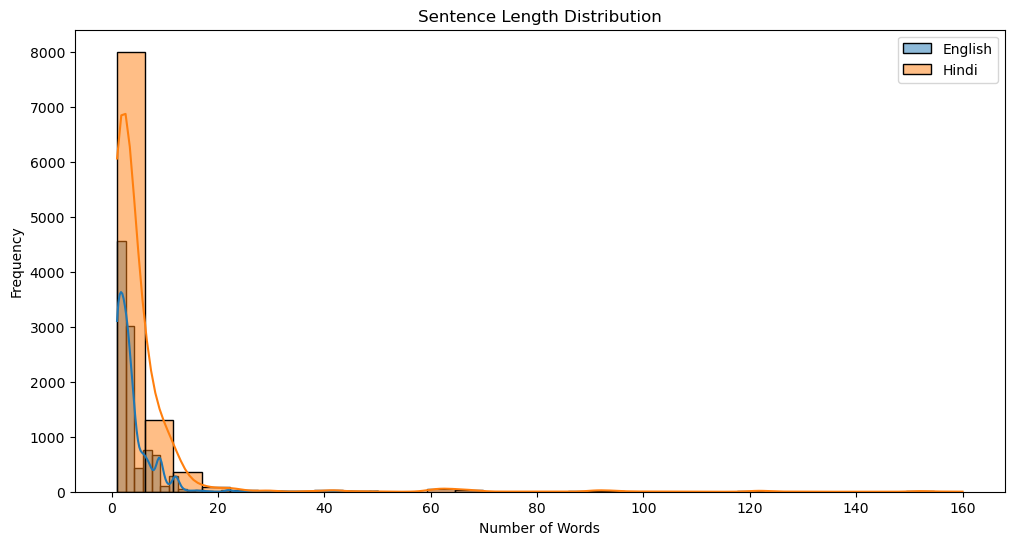

In [8]:
# Visualize sentence length distribution
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 6))
sns.histplot(english_lengths, bins=30, kde=True, label='English')
sns.histplot(hindi_lengths, bins=30, kde=True, label='Hindi')
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [9]:
# Null values
data = pd.DataFrame({'English': english_sentences, 'Hindi': hindi_sentences})
null_values = data.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
English    0
Hindi      0
dtype: int64


The provided code creates a Pandas DataFrame named data with two columns: 'English' and 'Hindi', containing the English and Hindi sentences, respectively. Then, it calculates the number of null values in each column and prints the result.This code helps you identify and handle null values in your dataset, which is essential for data cleaning and preprocessing tasks.






In [10]:
data.head()

,English,Hindi
0,Give your application an accessibility workout,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें
1,Accerciser Accessibility Explorer,एक्सेर्साइसर पहुंचनीयता अन्वेषक
2,The default plugin layout for the bottom panel,निचले पटल के लिए डिफोल्ट प्लग-इन खाका
3,The default plugin layout for the top panel,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका
4,A list of plugins that are disabled by default,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से नि...


This will print the first five rows of the DataFrame data, showing both the English and Hindi sentences stored in the 'English' and 'Hindi' columns, respectively. If you want to display a different number of rows, you can specify the desired number as an argument to the head() method, like data.head(10) to display the first ten rows.






In [11]:
data.tail()

,English,Hindi
9995,Properties,गुण
9996,Signals,सिग्नल
9997,Author Email Address:,ई-मेल पताः
9998,License:,लाइसेंसः
9999,Add to Project,परियोजना में जोड़ें


This will print the last five rows of the DataFrame data, showing both the English and Hindi sentences stored in the 'English' and 'Hindi' columns, respectively. If you want to display a different number of rows, you can specify the desired number as an argument to the tail() method, like data.tail(10) to display the last ten rows.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  10000 non-null  object
 1   Hindi    10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [13]:
# Duplicates
duplicates = data.duplicated().sum()
print("\nDuplicate Values:")
print(duplicates)


Duplicate Values:
6560


In [14]:
# Token count (with and without stopwords)
stop_words = set(stopwords.words('english'))
data['Word_Count_With_Stopwords'] = data['English'].apply(lambda x: len(word_tokenize(x)))
data['Word_Count_Without_Stopwords'] = data['English'].apply(lambda x: len([word for word in word_tokenize(x) if word.lower() not in stop_words]))

# Print word count with stopwords
print("Word Count With Stopwords:")
print(data['Word_Count_With_Stopwords'])

# Print word count without stopwords
print("\nWord Count Without Stopwords:")
print(data['Word_Count_Without_Stopwords'])


Word Count With Stopwords:
0       6
1       3
2       8
3       8
4       9
       ..
9995    1
9996    1
9997    4
9998    2
9999    3
Name: Word_Count_With_Stopwords, Length: 10000, dtype: int64

Word Count Without Stopwords:
0       4
1       3
2       5
3       5
4       4
       ..
9995    1
9996    1
9997    4
9998    2
9999    2
Name: Word_Count_Without_Stopwords, Length: 10000, dtype: int64


The provided code calculates the word count of each English sentence in the DataFrame data, both including and excluding stopwords. It then prints the word count for each sentence with and without stopwords.This code allows you to analyze the word count distribution in your English sentences, considering both the inclusion and exclusion of stopwords, which can be helpful for various text analysis tasks.






In [15]:
data.describe()

,Word_Count_With_Stopwords,Word_Count_Without_Stopwords
count,10000.000000,10000.000000
mean,3.804500,2.870500
std,3.822217,2.432719
min,1.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,3.000000
max,50.000000,31.000000


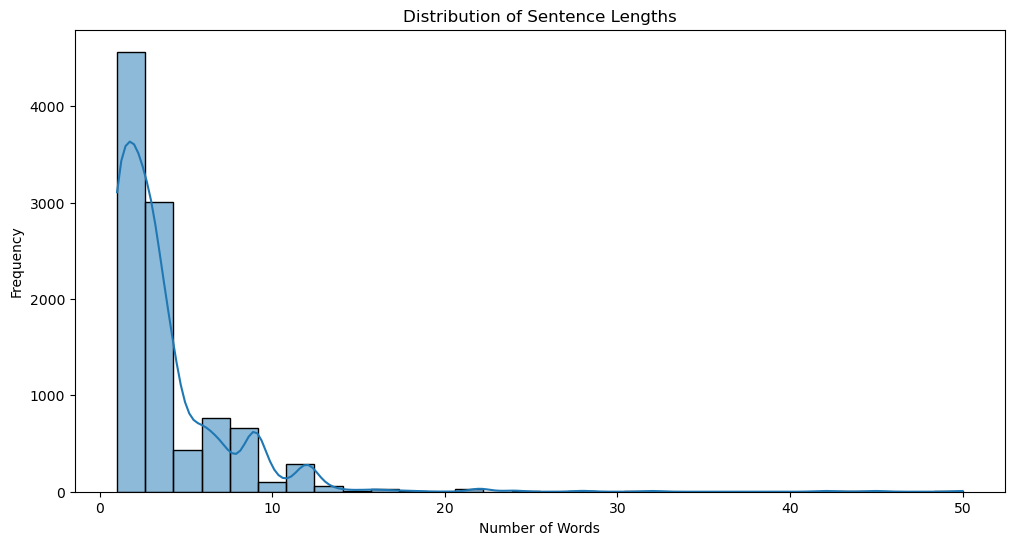

In [16]:
# Distribution of Length of sentences
data['Sentence_Length'] = data['English'].apply(lambda x: len(word_tokenize(x)))
plt.figure(figsize=(12, 6))
sns.histplot(data['Sentence_Length'], bins=30, kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

The provided code calculates the length of each English sentence in terms of the number of words and creates a histogram plot to visualize the distribution of sentence lengths.This code will generate a histogram plot illustrating the distribution of sentence lengths in terms of the number of words in your English sentences, helping you understand the variation in sentence lengths across your dataset.

In [17]:
# N-gram pairs
n_grams_en = []
n_grams_hi = []
for tokens in data['English'].apply(word_tokenize):
    n_grams_en.extend(list(nltk.ngrams(tokens, 2)))
for tokens in data['Hindi'].apply(word_tokenize):
    n_grams_hi.extend(list(nltk.ngrams(tokens, 2)))

The code is a way to visualize and inspect n-gram pairs for both English and Hindi sentences, which can be helpful for understanding the structure and patterns within the text data in both languages. to print English and Hindi n-gram pairs. N-grams are contiguous sequences of n items, typically words in the context of natural language processing. 

In [19]:
from textblob import TextBlob

def textblob_sentence_type(sentence):
    analysis = TextBlob(sentence)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentence_Type'] = data['English'].apply(textblob_sentence_type)


In [20]:
print(data[['English', 'Sentence_Type']])

                                             English Sentence_Type
0     Give your application an accessibility workout       Neutral
1                  Accerciser Accessibility Explorer       Neutral
2     The default plugin layout for the bottom panel       Neutral
3        The default plugin layout for the top panel      Positive
4     A list of plugins that are disabled by default      Negative
...                                              ...           ...
9995                                      Properties       Neutral
9996                                         Signals       Neutral
9997                           Author Email Address:       Neutral
9998                                        License:       Neutral
9999                                  Add to Project       Neutral

[10000 rows x 2 columns]


This code utilizes the TextBlob library to analyze the sentiment of English sentences and categorize them as positive, negative, or neutral based on their polarity score.
This function takes a sentence as input, creates a TextBlob object from the sentence, and calculates the polarity score of the sentence using analysis.sentiment.polarity.
If the polarity score is greater than 0, the function returns 'Positive'; if it's less than 0, it returns 'Negative'; otherwise, it returns 'Neutral'.
This line applies the textblob_sentence_type function to each English sentence in the 'English' column of the DataFrame data using the apply() method.
The resulting sentiment classification (positive, negative, or neutral) is stored in a new column named 'Sentence_Type'.
This code allows you to classify the sentiment of English sentences using TextBlob's built-in sentiment analysis capabilities, providing a quick way to gain insights into the sentiment distribution of your text data


In [21]:
# POS tagging
data['POS_Tags'] = data['English'].apply(lambda x: [(token.text, token.pos_) for token in nlp(x)])
print(data['POS_Tags'].head()) 

0    [(Give, VERB), (your, PRON), (application, NOU...
1    [(Accerciser, PROPN), (Accessibility, PROPN), ...
2    [(The, DET), (default, NOUN), (plugin, VERB), ...
3    [(The, DET), (default, NOUN), (plugin, VERB), ...
4    [(A, DET), (list, NOUN), (of, ADP), (plugins, ...
Name: POS_Tags, dtype: object


In [22]:
# Define your dataset with English sentences
english_sentences = data['English']

# Apply NER to each sentence
ner_results = []
for sentence in english_sentences:
    doc = nlp(sentence)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    ner_results.append(entities)

# Add the NER results to your DataFrame
data['NER'] = ner_results

# Display the first few rows of the DataFrame to verify the results
print(data.head())

                                          English  \
0  Give your application an accessibility workout   
1               Accerciser Accessibility Explorer   
2  The default plugin layout for the bottom panel   
3     The default plugin layout for the top panel   
4  A list of plugins that are disabled by default   

                                               Hindi  \
0    अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें   
1                    एक्सेर्साइसर पहुंचनीयता अन्वेषक   
2              निचले पटल के लिए डिफोल्ट प्लग-इन खाका   
3               ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका   
4  उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से नि...   

   Word_Count_With_Stopwords  Word_Count_Without_Stopwords  Sentence_Length  \
0                          6                             4                6   
1                          3                             3                3   
2                          8                             5                8   
3                          8

This code segment is intended to apply Named Entity Recognition (NER) to each English sentence in the dataset, store the results, and then add them as a new column named 'NER' to the DataFrame.This loop iterates over each English sentence in english_sentences.
For each sentence, it processes the text using the SpaCy NLP pipeline (nlp), which should have been initialized earlier in the code.
It extracts entities (named entities) from the processed document (doc) and stores them as tuples of (entity_text, entity_label) in a list named entities.
The list of entity tuples for each sentence is then appended to the ner_results list.This prints the first few rows of the DataFrame to verify that the NER results have been added correctly.
The NER results should now be stored in the 'NER' column of the DataFrame, with each row containing a list of tuples representing the named entities detected in the corresponding English sentence.






In [23]:
# Count of vowels
data['Vowel_Count'] = data['English'].apply(lambda x: sum(1 for char in x if char.lower() in 'aeiou'))
print(data['Vowel_Count'].head()) 

0    18
1    12
2    15
3    14
4    14
Name: Vowel_Count, dtype: int64


In [24]:
import warnings
warnings.filterwarnings("ignore", message="The model you're using has no word vectors loaded")

# Semantic analysis
data['Semantic_Similarity'] = data['English'].apply(lambda x: nlp(x).similarity(nlp(data['English'].iloc[0])))
# Display the DataFrame with semantic similarity
print(data[['English', 'Semantic_Similarity']])

                                             English  Semantic_Similarity
0     Give your application an accessibility workout             1.000000
1                  Accerciser Accessibility Explorer             0.298316
2     The default plugin layout for the bottom panel             0.296731
3        The default plugin layout for the top panel             0.277785
4     A list of plugins that are disabled by default             0.260734
...                                              ...                  ...
9995                                      Properties             0.063188
9996                                         Signals             0.061832
9997                           Author Email Address:             0.286909
9998                                        License:             0.218118
9999                                  Add to Project             0.270667

[10000 rows x 2 columns]


This code snippet performs semantic analysis by calculating the semantic similarity between each English sentence in the dataset and the first English sentence using the SpaCy model. Additionally, it filters out any warnings related to the absence of word vectors in the model using the warnings.filterwarnings function.This line calculates the semantic similarity between each English sentence (x) in the 'English' column of the DataFrame and the first English sentence (accessed via data['English'].iloc[0]).
It uses SpaCy's similarity method, which computes the similarity between two documents based on their word vectors.This line prints a subset of the DataFrame containing the 'English' column (the original sentences) and the 'Semantic_Similarity' column (the calculated semantic similarities).
This code snippet enables you to analyze the semantic similarity between each English sentence in the dataset and the first English sentence, providing insights into the similarity structure of the text data.
The results are stored in a new column named 'Semantic_Similarity' in the DataFrame data.

In [212]:
# Syntactic analysis (parse tree visualization)
from spacy import displacy
sentence = nlp(data['English'].iloc[0])
displacy.render(sentence, style='dep', jupyter=True)

C:\anaconda\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


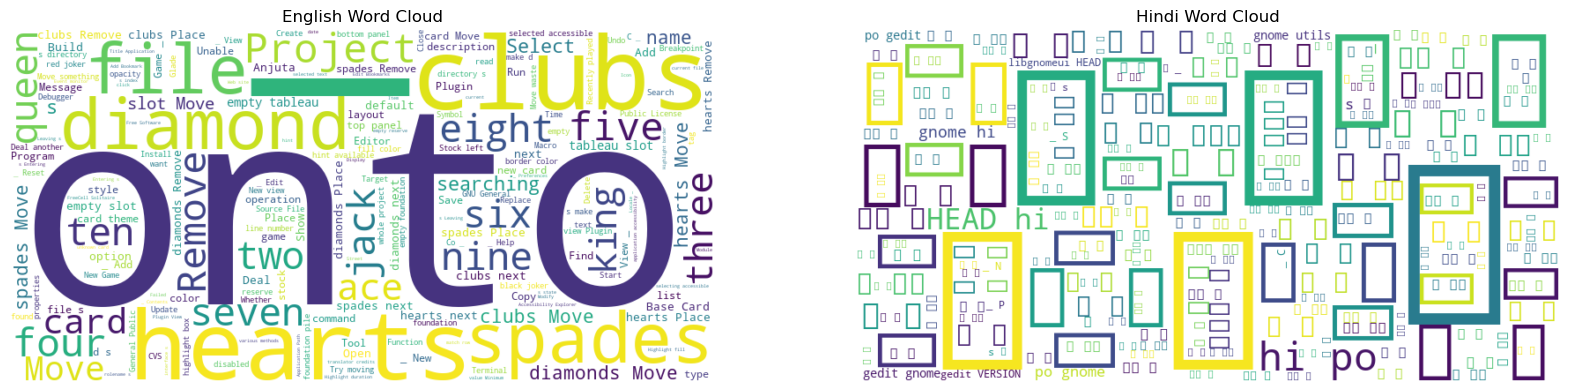

In [26]:
#wordcloud
wordcloud_en = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['English'].apply(word_tokenize).explode()))
wordcloud_hi = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Hindi'].apply(word_tokenize).explode()))
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_en, interpolation='bilinear')
plt.axis('off')
plt.title('English Word Cloud')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_hi, interpolation='bilinear')
plt.axis('off')
plt.title('Hindi Word Cloud')
plt.show()

This code generates word clouds for both English and Hindi text data and displays them side by side using matplotlib subplots. the code visualizes the word frequency distribution in both English and Hindi text data using word clouds and presents them side by side for comparison.
Generating Word Clouds:

wordcloud_en = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['English'].apply(word_tokenize).explode())): This line creates a word cloud for the English text data. It uses the WordCloud class from the wordcloud library, specifying the width, height, and background color of the word cloud. The generate method is used to generate the word cloud from the English text data. The English text data is preprocessed by tokenizing each sentence, then flattening the list of tokens using explode() to get a list of all words, and finally joining all words into a single string.

wordcloud_hi = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Hindi'].apply(word_tokenize).explode())): This line creates a word cloud for the Hindi text data in a similar manner as for English



In [27]:
english_tokens = [word_tokenize(sentence) for sentence in english_sentences]
english_tokens_flat = [word.lower() for sublist in english_tokens for word in sublist if word.isalpha() and word.lower() not in stop_words]

hindi_tokens = [word_tokenize(sentence) for sentence in hindi_sentences]
hindi_tokens_flat = [word.lower() for sublist in hindi_tokens for word in sublist if word.isalpha() and word.lower() not in stop_words]

english_freq_dist = Counter(english_tokens_flat)
hindi_freq_dist = Counter(hindi_tokens_flat)
print("Most Common Words in English:")
print(english_freq_dist.most_common(50))
print("\nMost Common Words in Hindi:")
print(hindi_freq_dist.most_common(50))


Most Common Words in English:
[('move', 571), ('onto', 435), ('clubs', 401), ('diamonds', 401), ('hearts', 401), ('spades', 401), ('remove', 323), ('file', 271), ('card', 270), ('project', 265), ('next', 238), ('place', 232), ('empty', 220), ('slot', 182), ('game', 158), ('name', 157), ('ten', 157), ('three', 152), ('two', 152), ('plugin', 149), ('four', 145), ('select', 144), ('king', 144), ('eight', 138), ('five', 138), ('six', 138), ('jack', 138), ('queen', 138), ('cards', 137), ('view', 133), ('seven', 131), ('nine', 131), ('new', 129), ('ace', 122), ('tableau', 117), ('foundation', 105), ('add', 103), ('anjuta', 103), ('show', 100), ('deal', 98), ('highlight', 97), ('c', 96), ('searching', 92), ('current', 91), ('selected', 91), ('help', 88), ('build', 84), ('color', 82), ('plugins', 78), ('program', 72)]

Most Common Words in Hindi:
[('एक', 570), ('पर', 467), ('hi', 426), ('po', 426), ('head', 262), ('बगल', 196), ('version', 158), ('आप', 157), ('x', 153), ('gedit', 144), ('और', 1

In [28]:
english_tokens = [word_tokenize(sentence) for sentence in english_sentences]
english_tokens_flat = [word.lower() for sublist in english_tokens for word in sublist if word.isalpha() and word.lower() not in stop_words]

hindi_tokens = [word_tokenize(sentence) for sentence in hindi_sentences]
hindi_tokens_flat = [word.lower() for sublist in hindi_tokens for word in sublist if word.isalpha() and word.lower() not in stop_words]

In [29]:
english_freq_dist = Counter(english_tokens_flat)
hindi_freq_dist = Counter(hindi_tokens_flat)

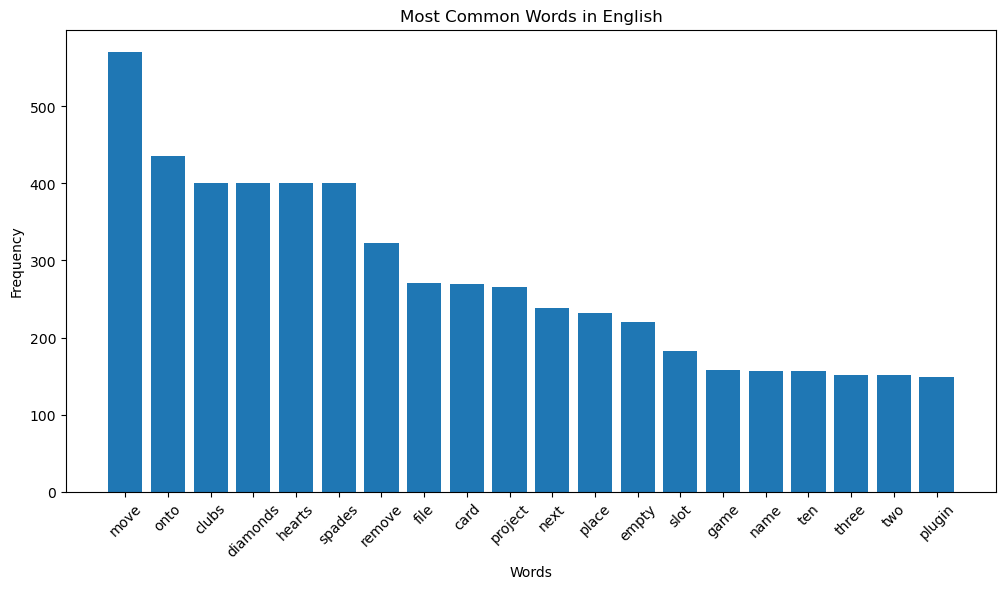

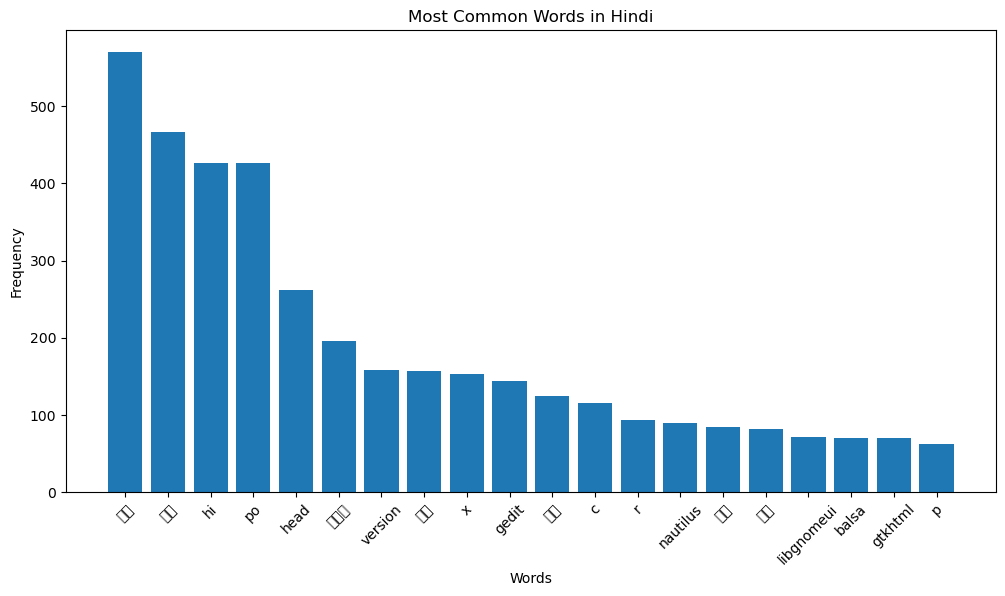

In [30]:
# Histogram for English Words
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 6))
plt.bar(*zip(*english_freq_dist.most_common(20)))
plt.title('Most Common Words in English')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Histogram for Hindi Words
plt.figure(figsize=(12, 6))
plt.bar(*zip(*hindi_freq_dist.most_common(20)))
plt.title('Most Common Words in Hindi')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [31]:
data.to_csv('processed_data.csv', index=False)

In [60]:
# Adding length of English and Hindi sentences
data['length_eng_sentence'] = data['English'].apply(lambda x: len(x.split(" ")))
data['length_hin_sentence'] = data['Hindi'].apply(lambda x: len(x.split(" ")))

print(data.head())

                        English                        Hindi  \
4119             % s on reserve  एक खाली खाँचाstockslot hint   
7719             _ Next Message             अगला संदेश (_ N)   
7972                 Call Graph                    काल ग्राफ   
859                H _ ypertext                     हाइपरपाठ   
4504  Remove the ten of spades.                हुकुम का दहला   

      Word_Count_With_Stopwords  Word_Count_Without_Stopwords  \
4119                          4                             2   
7719                          3                             3   
7972                          2                             2   
859                           3                             3   
4504                          6                             4   

      Sentence_Length Sentence_Type  \
4119                4       Neutral   
7719                3       Neutral   
7972                2       Neutral   
859                 3       Neutral   
4504                6       N

This code adds two new columns to the DataFrame data, namely 'length_eng_sentence' and 'length_hin_sentence', which represent the length (number of words) of English and Hindi sentences, respectively.
This line creates a new column 'length_eng_sentence' in the DataFrame data.
For each English sentence in the 'English' column, it applies a lambda function that splits the sentence into words using whitespace as a delimiter (x.split(" ")) and calculates the length of the resulting list (number of words).
The length of each English sentence is then stored in the corresponding row of the 'length_eng_sentence' column.This code allows you to analyze and compare the lengths of English and Hindi sentences in your dataset, which can be useful for various text processing and analysis tasks.


In [61]:
data.head()

,English,Hindi,Word_Count_With_Stopwords,Word_Count_Without_Stopwords,Sentence_Length,Sentence_Type,POS_Tags,NER,Vowel_Count,Semantic_Similarity,length_eng_sentence,length_hin_sentence
4119,% s on reserve,एक खाली खाँचाstockslot hint,4,2,4,Neutral,"[(%, INTJ), (s, X), (on, ADP), (reserve, NOUN)]",[],4,0.053405,4,4
7719,_ Next Message,अगला संदेश (_ N),3,3,3,Neutral,"[(_, PUNCT), (Next, ADJ), (Message, NOUN)]",[],4,0.122405,3,4
7972,Call Graph,काल ग्राफ,2,2,2,Neutral,"[(Call, VERB), (Graph, NOUN)]","[(Call Graph, ORG)]",2,0.383139,2,2
859,H _ ypertext,हाइपरपाठ,3,3,3,Neutral,"[(H, NOUN), (_, NOUN), (ypertext, NOUN)]",[],2,0.345418,3,1
4504,Remove the ten of spades.,हुकुम का दहला,6,4,6,Neutral,"[(Remove, VERB), (the, DET), (ten, NUM), (of, ...","[(ten, CARDINAL)]",8,0.230136,5,3


In [83]:
import numpy as np
from sklearn.metrics import accuracy_score
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_hindi_words))

num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_hindi_words)
num_decoder_tokens += 1  # for zero padding

This code snippet appears to be related to preparing data for a machine translation task using a sequence-to-sequence model, likely with an encoder-decoder architecture.It seems that all_eng_words and all_hindi_words are variables containing all unique English and Hindi words, respectively.
These lines convert the sets of unique words into sorted lists of words, which are then stored in input_words and target_words, respectively.
These lists will likely be used to map words to indices for one-hot encoding or embedding representation.These lines determine the number of tokens (unique words) in the input (English) and output (Hindi) vocabularies.
num_encoder_tokens is set to the total number of unique English words.
num_decoder_tokens is set to the total number of unique Hindi words plus 1, accounting for an additional token for zero padding, which is commonly used in sequence-to-sequence models to handle variable-length sequences.
This code snippet sets up the vocabulary and tokenization components necessary for processing input and target sequences in a machine translation model.


In [84]:
# Create input and target token index dictionaries
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = {'START_': 1}  
target_token_index.update({word: i+2 for i, word in enumerate(target_words)}) 

reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

data = data.sample(frac=1).reset_index(drop=True)  # Shuffle the DataFrame
data.head(10)


,English,Hindi,Word_Count_With_Stopwords,Word_Count_Without_Stopwords,Sentence_Length,Sentence_Type,POS_Tags,NER,Vowel_Count,Semantic_Similarity,length_eng_sentence,length_hin_sentence
0,Sample Plugin,नमूना प्लगिन,2,2,2,Neutral,"[(Sample, PROPN), (Plugin, PROPN)]","[(Sample Plugin, PERSON)]",4,0.190224,2,2
1,three of hearts,लाल पान की तिक्की,3,2,3,Neutral,"[(three, NUM), (of, ADP), (hearts, NOUN)]","[(three, CARDINAL)]",5,-0.009988,3,4
2,Project Defaults,परियोजना तयशुदा,2,2,2,Neutral,"[(Project, PROPN), (Defaults, NOUN)]","[(Project Defaults, ORG)]",5,0.122082,2,2
3,Remove the queens,बेगम मिटाएँ,3,2,3,Neutral,"[(Remove, VERB), (the, DET), (queens, NOUN)]",[],7,0.419004,3,2
4,Program:,प्रोग्रामः,2,2,2,Neutral,"[(Program, NOUN), (:, PUNCT)]",[],2,0.124916,1,1
5,Table Information,& lt; bgt; सारणी सूचनाlt;/bgt;,2,2,2,Neutral,"[(Table, NOUN), (Information, NOUN)]",[],7,0.366048,2,5
6,make: Leaving directory `% s',कार्यकारी डायरेक्टरी,8,7,8,Neutral,"[(make, VERB), (:, PUNCT), (Leaving, VERB), (d...",[],8,0.284470,5,2
7,_ Redo,दोहराएँ (_ R),2,2,2,Neutral,"[(_, PUNCT), (Redo, NOUN)]","[(Redo, PERSON)]",2,0.154701,2,3
8,Clear event log,घटना रोजनामचा मिटाओ,3,3,3,Positive,"[(Clear, ADJ), (event, NOUN), (log, NOUN)]",[],5,0.521396,3,3
9,Program '% s' does not exists,प्रोजेक्ट उपलब्ध नहीं है,8,5,8,Neutral,"[(Program, PROPN), (', PUNCT), (%, NOUN), (s, ...",[],7,0.119809,6,4



This code segment is involved in creating token index dictionaries for input and target sequences, along with reverse dictionaries for mapping indices back to tokens. Additionally, it shuffles the DataFrame data.This line creates a dictionary input_token_index where each English word is mapped to its corresponding index, starting from 1.
It uses a dictionary comprehension to iterate over the enumerated list of input words (input_words), where each word is assigned an index (starting from 0), and then incremented by 1 to start indexing from 1.This line shuffles the DataFrame data using the sample method with frac=1, which means all rows will be included in the sample (equivalent to shuffling the entire DataFrame).
The reset_index(drop=True) method resets the index after shuffling, ensuring a new sequential index without preserving the original index.
Overall, this code prepares token index dictionaries and reverse dictionaries, along with shuffling the DataFrame, which is often necessary for preparing data for training machine learning models.

In [102]:
# Get the length of the longest sequence in the dataset
max_length_src = data['English'].apply(lambda x: len(x.split())).max()
max_length_tar = data['Hindi'].apply(lambda x: len(x.split())).max()
data = shuffle(data)
print(data)

                                                English  \
9949                                      two of spades   
7976                                  _ Discard changes   
1788                                       Change Value   
6238                                      the red joker   
4651                                      _ Group name:   
...                                                 ...   
5091                                              Gypsy   
2904  Place the king of spades next to the queen of ...   
91                                    _ Recently Played   
7562                                       two of clubs   
2743                                      two of hearts   

                                                 Hindi  \
9949                                   हुकुम का दुक्का   
7976                               बदलाव त्यागें (_ D)   
1788                                         मान बदलें   
6238                                          लाल जोकर   
4

This code segment calculates the length of the longest sequence (in terms of the number of words) in both the English and Hindi datasets. It then shuffles the DataFrame data.These lines compute the maximum length of sequences in the English and Hindi datasets.
data['English'].apply(lambda x: len(x.split())).max() calculates the maximum sequence length for English sentences by splitting each sentence into words using whitespace as a delimiter and then finding the maximum length among all sentences.
Similarly, data['Hindi'].apply(lambda x: len(x.split())).max() calculates the maximum sequence length for Hindi sentences.Overall, this code segment is likely part of the data preprocessing step for training a machine learning model, where it's important to understand the maximum sequence length in the dataset and to shuffle the data to ensure randomness during training.

In [65]:
from sklearn.model_selection import train_test_split
X, y = data['English'], data['Hindi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8000,), (2000,))

This code segment utilizes scikit-learn's train_test_split function to split the English and Hindi datasets into training and testing sets.This line splits the data into training and testing sets.
X and y are the input (English) and target (Hindi) variables, respectively.
test_size=0.2 specifies that 20% of the data will be used for testing, while the remaining 80% will be used for training.
random_state=42 sets the random seed for reproducibility.This line prints the shape (number of samples, number of features) of the training and testing sets for the input (English) data.
X_train.shape returns the shape of the training set for English data.
X_test.shape returns the shape of the testing set for English data.
Overall, this code segment is responsible for splitting the data into training and testing sets, which is a standard practice in machine learning to evaluate model performance on unseen data.






In [66]:
X_train

9254                                    the two of spades
1561                                    Activated plugins
1670                               Indentation parameters
6087                                               Reload
6669    Place the jack of hearts next to the ten of he...
                              ...                        
5734    Position of the horizontal split of the main w...
5191                                     Three card deals
5390                                              Osmosis
860                               View help for Aisleriot
7270                                            Hopscotch
Name: English, Length: 8000, dtype: object

In [67]:
y_train

9254                                      हुकुम का दुक्का
1561                                        सक्रिय प्लगिन
1670                                      हाशिया पैरामीटर
6087                                               री-लोड
6669    लाल पान की गुलाम के बगल में लाल पान के दहला को...
                              ...                        
5734             मुख्य विंडो की क्षैतिज विभाजन की स्थिति.
5191                                     तीन पत्ते बांटें
5390                                             ऑस्मोसिस
860                       एस्लेरियाट के लिये सहायता देखें
7270                                             हॉपस्कॉच
Name: Hindi, Length: 8000, dtype: object

In [68]:
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

The code saves the training and testing sets of English sentences (X_train and X_test) into pickle files named 'X_train.pkl' and 'X_test.pkl', respectively. Pickle is a Python serialization format used to save Python objects to disk.This line saves the testing set of English sentences (X_test) to a pickle file named 'X_test.pkl'.
Saving datasets using pickle allows you to store them efficiently and reload them later for further analysis or for use in machine learning models.

In [69]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def generate_batch(X=X_train, y=y_train, batch_size=128):
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src), dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar), dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens), dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index.get(word, 0)  # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t < len(target_text.split()) - 1:
                        decoder_input_data[i, t] = target_token_index.get(word, 0)  # decoder input seq
                    if t > 0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index.get(word, 0)] = 1.
            yield [encoder_input_data, decoder_input_data], decoder_target_data


This code defines a generator function generate_batch for generating batches of training data for a sequence-to-sequence model. It is designed to work with Keras for training neural networks.This function yields batches of training data indefinitely using a while loop and the yield statement, making it suitable for use with Keras' fit_generator function.
Within each iteration, the function loops through the data in batches of size batch_size.
For each batch, it initializes arrays (encoder_input_data, decoder_input_data, and decoder_target_data) to store the input and target sequences.
It then iterates over each input and target sentence pair in the batch, tokenizes them, and converts them into integer sequences using the token index dictionaries (input_token_index and target_token_index).
For the decoder target data, it one-hot encodes the sequences, excluding the first token (START_), and offsets the target sequences by one timestep.
Finally, it yields the encoder input, decoder input, and decoder target data for the batch.
Overall, this function generates batches of training data on-the-fly, which is memory-efficient and suitable for training large-scale sequence-to-sequence models.






In [70]:
#Encoder-Decoder Architecture
latent_dim=300

In [71]:
# Encoder
from keras.layers import Input, Embedding, LSTM
encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(num_encoder_tokens, latent_dim, mask_zero=True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]


This code segment defines the encoder architecture for a sequence-to-sequence model using Keras with a Long Short-Term Memory (LSTM) layer.This line creates an embedding layer for the encoder. The embedding layer converts the input sequences into dense vectors of fixed size (latent_dim).
num_encoder_tokens specifies the number of unique tokens in the input vocabulary.
latent_dim represents the dimensionality of the embedding space.
mask_zero=True is used to mask padded values (zeros) in the input sequences.This defines an LSTM layer with latent_dim units for the encoder.
return_state=True ensures that the final states of the LSTM layer are returned along with the outputs.
The input to the LSTM layer is the embedded input sequences (enc_emb).
The LSTM layer processes the input sequences and produces outputs (encoder_outputs) as well as final hidden states (state_h) and final cell states (state
encoder_states = [state_h, state_c]
This line defines a list encoder_states containing the final hidden state (state_h) and the final cell state (state_c) of the LSTM layer.
These states will be used as initial states for the decoder in the sequence-to-sequence model.
Overall, this code segment sets up the encoder architecture, including the input layer, embedding layer, and LSTM layer, for a sequence-to-sequence model.

In [72]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


This code segment sets up the decoder architecture for a sequence-to-sequence model using Keras with an LSTM layer and a dense softmax layer.This sets up an LSTM layer for the decoder. It processes the embedded input sequences (dec_emb) and returns sequences (return_sequences=True) as well as the internal states (return_state=True).
initial_state=encoder_states initializes the decoder LSTM's hidden and cell states using the final states of the encoder LSTM.This defines a dense softmax layer that outputs the probability distribution over the vocabulary for each timestep in the decoder output sequences.
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
This creates an instance of the Model class with inputs as encoder and decoder inputs, and outputs as decoder outputs.
The model is responsible for mapping encoder input data and decoder input data to decoder target data during training.
Overall, this code segment constructs the decoder part of a sequence-to-sequence model, which takes encoder states as initial states and generates output sequences.

In [73]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

The compile method in Keras is used to configure the learning process of the model.Optimizer: The optimizer parameter specifies the optimization algorithm to use during training. In this case, 'rmsprop' refers to the RMSprop optimizer, which is a variant of stochastic gradient descent (SGD) that adapts the learning rate during training. RMSprop is commonly used for training recurrent neural networks (RNNs), such as LSTM models.

Loss function: The loss parameter specifies the loss function to use during training. In this case, 'categorical_crossentropy' is used, which is a common choice for multi-class classification problems where the target variable is one-hot encoded. It calculates the cross-entropy loss between the predicted probabilities and the true class labels.

By compiling the model with these settings, it is ready to be trained using the specified optimization algorithm and loss function. During training, the optimizer will adjust the model's parameters (e.g., weights and biases) to minimize the specified loss function, thereby improving the model's performance on the training data.

In [74]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, None, 300)            621300    ['input_3[0][0]']             
                                                                                                  
 embedding_3 (Embedding)     (None, None, 300)            636000    ['input_4[0][0]']             
                                                                                            

In [75]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 10

This code segment defines variables train_samples, val_samples, batch_size, and epochs, which are commonly used in training deep learning models:

train_samples: It represents the number of samples in the training dataset (X_train). It is typically used to calculate the number of steps per epoch during training.

val_samples: It represents the number of samples in the validation dataset (X_test). It is used for validation during training to monitor the model's performance on unseen data.

batch_size: It specifies the number of samples per gradient update. It determines how many samples are processed before the model's parameters are updated during training.

epochs: It defines the number of complete passes through the entire training dataset during training. Each epoch consists of one forward pass and one backward pass (gradient update) for all training samples.

In [76]:
max_length_src = max(data['English'].apply(lambda x: len(word_tokenize(x))))
max_length_tar = max(data['Hindi'].apply(lambda x: len(word_tokenize(x))))

print("Maximum length of source sequences:", max_length_src)
print("Maximum length of target sequences:", max_length_tar)


Maximum length of source sequences: 50
Maximum length of target sequences: 160



This code calculates the maximum length of sequences in terms of the number of tokens (words) for both the source (English) and target (Hindi) sequences in the dataset. It then prints out these maximum lengths.These lines use the apply function along with a lambda function to apply the len(word_tokenize(x)) function to each English and Hindi sentence in the dataset.
word_tokenize(x) tokenizes each sentence into words using the word_tokenize function from the NLTK library.
max() function then finds the maximum length among all tokenized sentences for both English and Hindi.These lines print out the maximum lengths of source (English) and target (Hindi) sequences.
Overall, this code helps in understanding the distribution of sequence lengths in the dataset, which can be useful for setting appropriate hyperparameters and for data preprocessing steps such as padding sequences to a fixed length.

In [77]:
import numpy as np
model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)

Epoch 1/10
62/62 [==============================] - 537s 8s/step - loss: 6.3556 - val_loss: 5.3785
Epoch 2/10
62/62 [==============================] - 1474s 24s/step - loss: 5.2158 - val_loss: 5.0089
Epoch 3/10
62/62 [==============================] - 539s 9s/step - loss: 4.8940 - val_loss: 4.6925
Epoch 4/10
62/62 [==============================] - 540s 9s/step - loss: 4.5648 - val_loss: 4.4029
Epoch 5/10
62/62 [==============================] - 517s 8s/step - loss: 4.2741 - val_loss: 4.1138
Epoch 6/10
62/62 [==============================] - 549s 9s/step - loss: 3.9902 - val_loss: 3.8689
Epoch 7/10
62/62 [==============================] - 519s 8s/step - loss: 3.7302 - val_loss: 3.6236
Epoch 8/10
62/62 [==============================] - 551s 9s/step - loss: 3.4923 - val_loss: 3.4288
Epoch 9/10
62/62 [==============================] - 574s 9s/step - loss: 3.2827 - val_loss: 3.2489
Epoch 10/10
62/62 [==============================] - 572s 9s/step - loss: 3.0900 - val_loss: 3.0498


The provided code is utilizing Keras' fit_generator function to train the model using data generated batch by batch by a Python generator.
Here's what's happening:
fit_generator function: This function trains the model on data generated batch by batch by a Python generator. It expects a generator that yields batches of input samples and target labels indefinitely.
generator argument: This specifies the generator function to use for generating batches of training data. In this case, generate_batch(X_train, y_train, batch_size=batch_size) is used to generate batches of training data.
steps_per_epoch argument: This specifies the number of steps (batches) to yield from the generator for each epoch. It's calculated as train_samples // batch_size, which ensures that the entire training dataset is used once per epoch.
epochs argument: This specifies the number of epochs (complete passes through the entire training dataset) to train the model.
validation_data argument: This specifies the generator function to use for generating batches of validation data. generate_batch(X_test, y_test, batch_size=batch_size) is used to generate batches of validation data.
validation_steps argument: This specifies the number of steps (batches) to yield from the validation generator after each epoch. It's calculated as val_samples // batch_size.
Overall, this code efficiently trains the model using the provided generators, allowing for training on large datasets without loading all data into memory at once.

In [209]:
# Shuffle the DataFrame
from sklearn.utils import shuffle
data = shuffle(data)
data.head(10)

,English,Hindi,Word_Count_With_Stopwords,Word_Count_Without_Stopwords,Sentence_Length,Sentence_Type,POS_Tags,NER,Vowel_Count,Semantic_Similarity,length_eng_sentence,length_hin_sentence,english,hindi,length_eng,length_hin
4162,black joker,START_ काला जोकर _END,2,2,2,Negative,"[(black, ADJ), (joker, NOUN)]",[],3,0.229166,2,2,black joker,काला जोकर,2,4
8659,q,START_ qcard symbol _END,1,1,1,Neutral,"[(Q, VERB)]",[],0,0.221272,1,2,q,qcard symbol,1,4
2790,gtk,START_ जीटीके _END,2,2,2,Neutral,"[(GTK, PROPN), (+, ADP)]","[(GTK, ORG)]",0,0.182672,2,2,gtk,जीटीके,2,4
2542,fourteen,START_ चौदह _END,1,1,1,Neutral,"[(Fourteen, NUM)]","[(Fourteen, CARDINAL)]",4,0.096944,1,1,fourteen,चौदह,1,3
402,monitor events,START_ घटनाओं को मानिटर करें m _END,3,3,3,Neutral,"[(_, PUNCT), (Monitor, VERB), (Events, NOUN)]",[],5,0.121158,3,6,monitor events,घटनाओं को मानिटर करें m,3,7
9768,save all files,START_ सभी खुली फाइलों को बंद करें _END,3,2,3,Neutral,"[(Save, VERB), (all, DET), (files, NOUN)]",[],5,0.312230,3,6,save all files,सभी खुली फाइलों को बंद करें,3,8
1000,k,START_ kcard symbol _END,1,1,1,Neutral,"[(K, NOUN)]",[],0,0.297955,1,2,k,kcard symbol,1,4
5298,revision,START_ संशोधनः _END,2,2,2,Neutral,"[(Revision, NOUN), (:, PUNCT)]",[],4,0.232103,1,1,revision,संशोधनः,1,3
3645,please fill in empty pile first,START_ कृपया खाली ढेर को पहले भरें _END,7,6,7,Positive,"[(Please, INTJ), (fill, VERB), (in, ADP), (emp...","[(first, ORDINAL)]",9,0.205995,6,6,please fill in empty pile first,कृपया खाली ढेर को पहले भरें,6,8
3879,fortunes,START_ सौभाग्य _END,1,1,1,Neutral,"[(Fortunes, NOUN)]",[],3,0.111215,1,1,fortunes,सौभाग्य,1,3


In [78]:
model.save_weights('nmt_weights.h5')

The save_weights method in Keras is used to save the weights of a model to a file in Hierarchical Data Format (HDF5) format. Here's what the provided line of code does:
model.save_weights('nmt_weights.h5')
model: This is the trained Keras model.

save_weights: This method is used to save the weights of the model.

'nmt_weights.h5': This is the file path where the weights will be saved. The weights will be saved in HDF5 format with the file extension .h5.

By saving the weights of the model, you can later load these weights into another model with the same architecture or use them to initialize the weights of a similar model. This is useful for transfer learning, fine-tuning, or sharing trained models with others.

In [79]:
encoder_model = Model(encoder_inputs, encoder_states)
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) 
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)

decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)


The provided code defines two models: encoder_model and decoder_model, which are parts of the sequence-to-sequence model. These models are used for inference during the translation process.These lines define input placeholders for the initial states of the decoder LSTM. These states will be used as initial conditions during inference.
dec_emb2= dec_emb_layer(decoder_inputs)
This line embeds the decoder input sequences (decoder_inputs) using the same embedding layer used during training.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
This line runs the decoder LSTM using the embedded decoder input sequences (dec_emb2) and the initial states (decoder_states_inputs). It produces decoder outputs and the new hidden and cell states of the decoder LSTM.
decoder_outputs2 = decoder_dense(decoder_outputs2)
This line applies the dense softmax layer to the decoder outputs to produce the final output probabilities.
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs2] + decoder_states2)
This line defines the decoder_model using the Model class in Keras.
The model takes the decoder inputs and initial states as inputs and produces decoder outputs and new states as outputs. These new states will be fed back into the model for the next timestep during inference.
These models are used during inference to translate input sequences. The encoder_model encodes the input sequence into a fixed-size representation, and the decoder_model generates the output sequence token by token based on the encoded representation and previous tokens.

In [93]:
# Define the decode_sequence function
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_token_index['START_']
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char  
        if (sampled_char == '_END' or len(decoded_sentence) > 50):
            stop_condition = True
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]
    return decoded_sentence

The provided decode_sequence function defines the decoding process for translating input sequences into target sequences using the trained encoder and decoder models. Here's what the function does:
It takes an input sequence (input_seq) as input.
It uses the encoder_model to predict the final states (states_value) of the encoder LSTM given the input sequence.
It initializes an empty target sequence (target_seq) with the start token.
It initializes an empty string decoded_sentence to store the decoded output sequence.
It sets a stop_condition flag to False.
It enters a loop where it iteratively predicts the next token in the output sequence until either the end token (_END) is predicted or the maximum sequence length is reached.
Inside the loop:
It uses the decoder_model to predict the output token probabilities given the current target sequence and states.
It selects the token with the highest probability (sampled_token_index) as the predicted token.
It retrieves the corresponding character (sampled_char) from the target token index.
It appends the sampled character to the decoded sentence.
If the end token is predicted or the maximum sequence length is reached, it sets the stop_condition flag to True to exit the loop.
It returns the decoded sentence.
Overall, this function performs sequence decoding by iteratively predicting the next token in the output sequence based on the input sequence and the previously generated tokens. It stops when the end token is predicted or the maximum sequence length is reached.

In [140]:
encoder_model = Model(encoder_inputs, encoder_states)

defines the encoder_model. This model takes the encoder inputs (encoder_inputs) and produces the final states of the encoder LSTM (encoder_states), which include the final hidden state and final cell state.
encoder_model = Model(encoder_inputs, encoder_states)
This line uses the Model class from Keras to create a model named encoder_model.
The model takes encoder_inputs as input and produces encoder_states as output.
encoder_inputs: This represents the input layer of the encoder model, which takes the input sequences.
encoder_states: This represents the final states of the encoder LSTM, which include the final hidden state (state_h) and final cell state (state_c).
This encoder_model is useful for obtaining the encoder states given input sequences. It can be used during inference or for other tasks such as feature extraction.

In [203]:
import numpy as np
k=-1
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

1/1 [==============================] - 0s 31ms/step
Input English sentence: return cards to stock
Actual Hindi Translation:  ताश के पत्तों को ढेर में वापस करें 
Predicted Hindi Translation:  अंजूटा प्रोजेक्ट मैनेजर फैक्ट्री 


This code snippet appears to be part of a loop iterating over training data to decode input sequences and compare the predicted translations with the actual translations. Here's what each part does:
Initialization:
k = -1: Initializes the variable k to -1.
Iteration:
k += 1: Increments k by 1, effectively iterating through the training data one sample at a time.
Data Retrieval:
(input_seq, actual_output), _ = next(train_gen): Retrieves the next batch of data (input_seq and actual_output) from the training generator train_gen. The _ indicates that we're not using the second element returned by next, which typically represents labels or targets.
Decoding:
decoded_sentence = decode_sequence(input_seq): Decodes the input sequence (input_seq) using the decode_sequence function. This function predicts the translation of the input sequence.
Printing:
print('Input English sentence:', X_train[k:k+1].values[0]): Prints the input English sentence corresponding to the current iteration.
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4]): Prints the actual Hindi translation corresponding to the current iteration. It seems to slice off some characters from the beginning and end of the actual translation, possibly to remove special tokens like "START_" and "_END".
print('Predicted Hindi Translation:', decoded_sentence[:-4]): Prints the predicted Hindi translation obtained from the decode_sequence function. Similarly, it seems to slice off some characters from the end of the decoded sentence, likely to remove the special token "_END".
Overall, this code snippet iterates through the training data, decodes input sequences, and compares the predicted translations with the actual translations, printing them for inspection.

In [204]:
k=-1
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

1/1 [==============================] - 0s 47ms/step
Input English sentence: return cards to stock
Actual Hindi Translation:  ताश के पत्तों को ढेर में वापस करें 
Predicted Hindi Translation:  बचा भंडारः a 


In [205]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])


1/1 [==============================] - 0s 63ms/step
Input English sentence: remove the fours
Actual Hindi Translation:  चव्वा मिटाएँ 
Predicted Hindi Translation:  डाउनलोड 


In [206]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])


1/1 [==============================] - 0s 31ms/step
Input English sentence: place the queen of hearts next to the jack of hearts
Actual Hindi Translation:  लाल पान की बेगम के बगल में लाल पान के गुलाम को रखें 
Predicted Hindi Translation:  पाँच मूलाधार 


In [147]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim import corpora, models
import gensim
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import nltk
nltk.download('stopwords')
all_english_text = ' '.join(data['English'].astype(str))
stop_words = set(stopwords.words('English'))
tokens = [word.lower() for word in word_tokenize(all_english_text) if
word.isalpha() and word.lower() not in stop_words]
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]
lda_model = gensim.models.LdaModel(corpus, num_topics=5, 
id2word=dictionary, passes=15)
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva_sirasanagandla\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


This code segment utilizes the Latent Dirichlet Allocation (LDA) algorithm from the Gensim library to perform topic modeling on English text data. Here's what each part of the code does:
Importing Libraries and Downloading NLTK Resources:
The code imports necessary libraries such as pandas, NLTK, Gensim, and pyLDAvis. It also downloads the NLTK stopwords corpus using nltk.download('stopwords').
Preprocessing:
all_english_text = ' '.join(data['English'].astype(str)): Concatenates all English text data into a single string.
stop_words = set(stopwords.words('english')): Retrieves a set of English stopwords using NLTK's stopwords.words() function.
Tokenization and Filtering:
The English text is tokenized using NLTK's word_tokenize function.
The tokens are converted to lowercase and filtered to remove non-alphabetic words and stopwords.
Dictionary and Corpus Creation:
dictionary = corpora.Dictionary([tokens]): Creates a Gensim dictionary from the tokenized text.
corpus = [dictionary.doc2bow(tokens)]: Converts the tokenized text into a bag-of-words format using the dictionary.
LDA Model Training:
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15): Trains an LDA model on the corpus with 5 topics and 15 passes over the corpus.
Visualization:
vis = gensimvis.prepare(lda_model, corpus, dictionary): Prepares the LDA visualization data using pyLDAvis.
pyLDAvis.display(vis): Displays the LDA visualization using pyLDAvis.
Overall, this code segment performs topic modeling using LDA on the English text data and visualizes the results using pyLDAvis. It helps identify the underlying topics present in the text corpus.


In [152]:
import re
data['English']=data['English'].apply(lambda x: str(x))
data['Hindi']=data['Hindi'].apply(lambda x: str(x))
data['English']=data['English'].apply(lambda x: x.lower())
data['Hindi']=data['Hindi'].apply(lambda x: x.lower())
data['Hindi'][0]
'start_ निचले पटल के लिए डिफोल्ट प्लग-इन खाका _end'
data['English']=data['English'].apply(lambda x: re.sub("'", '', x))
data['Hindi']=data['Hindi'].apply(lambda x: re.sub("'", '', x))
data.head()

,English,Hindi,Word_Count_With_Stopwords,Word_Count_Without_Stopwords,Sentence_Length,Sentence_Type,POS_Tags,NER,Vowel_Count,Semantic_Similarity,length_eng_sentence,length_hin_sentence
9949,two of spades,हुकुम का दुक्का,3,2,3,Neutral,"[(two, NUM), (of, ADP), (spades, NOUN)]","[(two, CARDINAL)]",4,0.066457,3,3
7976,_ discard changes,बदलाव त्यागें (_ d),3,3,3,Neutral,"[(_, PUNCT), (Discard, PROPN), (changes, VERB)]","[(Discard, PERSON)]",4,0.098430,3,4
1788,change value,मान बदलें,2,2,2,Neutral,"[(Change, VERB), (Value, PROPN)]","[(Change Value, PERSON)]",5,0.356581,2,2
6238,the red joker,लाल जोकर,3,2,3,Neutral,"[(the, DET), (red, ADJ), (joker, NOUN)]","[(the red joker, PRODUCT)]",4,0.218705,3,2
4651,_ group name:,परियोजना नामः,4,4,4,Neutral,"[(_, PUNCT), (Group, PROPN), (name, NOUN), (:,...",[],4,0.155952,3,2


In [154]:
import string
from string import digits
exclude = set(string.punctuation) 
data['English']=data['English'].apply(lambda x: ''.join(ch for ch in
x if ch not in exclude))
data['Hindi']=data['Hindi'].apply(lambda x: ''.join(ch for ch in x 
if ch not in exclude))
data.head()


,English,Hindi,Word_Count_With_Stopwords,Word_Count_Without_Stopwords,Sentence_Length,Sentence_Type,POS_Tags,NER,Vowel_Count,Semantic_Similarity,length_eng_sentence,length_hin_sentence
9949,two of spades,हुकुम का दुक्का,3,2,3,Neutral,"[(two, NUM), (of, ADP), (spades, NOUN)]","[(two, CARDINAL)]",4,0.066457,3,3
7976,discard changes,बदलाव त्यागें d,3,3,3,Neutral,"[(_, PUNCT), (Discard, PROPN), (changes, VERB)]","[(Discard, PERSON)]",4,0.098430,3,4
1788,change value,मान बदलें,2,2,2,Neutral,"[(Change, VERB), (Value, PROPN)]","[(Change Value, PERSON)]",5,0.356581,2,2
6238,the red joker,लाल जोकर,3,2,3,Neutral,"[(the, DET), (red, ADJ), (joker, NOUN)]","[(the red joker, PRODUCT)]",4,0.218705,3,2
4651,group name,परियोजना नामः,4,4,4,Neutral,"[(_, PUNCT), (Group, PROPN), (name, NOUN), (:,...",[],4,0.155952,3,2


In [207]:
remove_digits = str.maketrans('', '', digits)
remove_digits
{48: None,
 49: None,
 50: None,
 51: None,
 52: None,
 53: None,
 54: None,
 55: None,
 56: None,
 57: None}
a = data['English'][0].translate(remove_digits)

In [159]:
remove_digits = str.maketrans('', '', digits)
data['English']=data['English'].apply(lambda x: 
x.translate(remove_digits))
data['Hindi']=data['Hindi'].apply(lambda x: 
x.translate(remove_digits))
data['Hindi'] = data['Hindi'].apply(lambda x: re.sub("[२३०८१५७९४६]",
"", x))
data['english']=data['English'].apply(lambda x: x.strip())
data['hindi']=data['Hindi'].apply(lambda x: x.strip())
data['english']=data['English'].apply(lambda x: re.sub(" +", " ", 
x))
data['Hindi']=data['Hindi'].apply(lambda x: re.sub(" +", " ", x))
data['English'][0]
'give your application an accessibility workout'
data['Hindi'] = data['Hindi'].apply(lambda x: 'START_ '+ x + ' _END')
data['Hindi'][0]
'START_ अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें _END'


'START_ अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें _END'

In [161]:
all_eng_words = set()
for eng in data['English']:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

all_hindi_words = set()
for hin in data['Hindi']:
    for word in hin.split():
        if word not in all_hindi_words:
            all_hindi_words.add(word)

data.head()

,English,Hindi,Word_Count_With_Stopwords,Word_Count_Without_Stopwords,Sentence_Length,Sentence_Type,POS_Tags,NER,Vowel_Count,Semantic_Similarity,length_eng_sentence,length_hin_sentence,english,hindi
9949,two of spades,START_ हुकुम का दुक्का _END,3,2,3,Neutral,"[(two, NUM), (of, ADP), (spades, NOUN)]","[(two, CARDINAL)]",4,0.066457,3,3,two of spades,हुकुम का दुक्का
7976,discard changes,START_ बदलाव त्यागें d _END,3,3,3,Neutral,"[(_, PUNCT), (Discard, PROPN), (changes, VERB)]","[(Discard, PERSON)]",4,0.098430,3,4,discard changes,बदलाव त्यागें d
1788,change value,START_ मान बदलें _END,2,2,2,Neutral,"[(Change, VERB), (Value, PROPN)]","[(Change Value, PERSON)]",5,0.356581,2,2,change value,मान बदलें
6238,the red joker,START_ लाल जोकर _END,3,2,3,Neutral,"[(the, DET), (red, ADJ), (joker, NOUN)]","[(the red joker, PRODUCT)]",4,0.218705,3,2,the red joker,लाल जोकर
4651,group name,START_ परियोजना नामः _END,4,4,4,Neutral,"[(_, PUNCT), (Group, PROPN), (name, NOUN), (:,...",[],4,0.155952,3,2,group name,परियोजना नामः


In [162]:
row_count=len(data)
print(f'The DataFrame has {row_count} rows.')

The DataFrame has 10000 rows.


In [163]:
data['length_eng']=data['English'].apply(lambda x:len(x.split(" ")))
data['length_hin']=data['Hindi'].apply(lambda x:len(x.split(" ")))
data.head()

,English,Hindi,Word_Count_With_Stopwords,Word_Count_Without_Stopwords,Sentence_Length,Sentence_Type,POS_Tags,NER,Vowel_Count,Semantic_Similarity,length_eng_sentence,length_hin_sentence,english,hindi,length_eng,length_hin
9949,two of spades,START_ हुकुम का दुक्का _END,3,2,3,Neutral,"[(two, NUM), (of, ADP), (spades, NOUN)]","[(two, CARDINAL)]",4,0.066457,3,3,two of spades,हुकुम का दुक्का,3,5
7976,discard changes,START_ बदलाव त्यागें d _END,3,3,3,Neutral,"[(_, PUNCT), (Discard, PROPN), (changes, VERB)]","[(Discard, PERSON)]",4,0.098430,3,4,discard changes,बदलाव त्यागें d,3,5
1788,change value,START_ मान बदलें _END,2,2,2,Neutral,"[(Change, VERB), (Value, PROPN)]","[(Change Value, PERSON)]",5,0.356581,2,2,change value,मान बदलें,2,4
6238,the red joker,START_ लाल जोकर _END,3,2,3,Neutral,"[(the, DET), (red, ADJ), (joker, NOUN)]","[(the red joker, PRODUCT)]",4,0.218705,3,2,the red joker,लाल जोकर,3,4
4651,group name,START_ परियोजना नामः _END,4,4,4,Neutral,"[(_, PUNCT), (Group, PROPN), (name, NOUN), (:,...",[],4,0.155952,3,2,group name,परियोजना नामः,3,4


In [166]:
data=data[data['length_eng']<=20]
data=data[data['length_hin']<=20]
print("maximum length of Hindi Sentence ", max(data['length_hin']))
print("maximum length of English Sentence ", max(data['length_eng']))


maximum length of Hindi Sentence  20
maximum length of English Sentence  20


In [167]:
max_length_src=max(data['length_hin'])
max_length_tar=max(data['length_eng'])

In [168]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_hindi_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_hindi_words)
num_encoder_tokens, num_decoder_tokens

(1525, 2018)

In [170]:
num_decoder_tokens

2019

In [171]:
num_decoder_tokens += 1
num_decoder_tokens

2020

In [172]:
input_token_index = dict([(word, i+1) for i, word in
enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in
enumerate(target_words)])

In [173]:
input_token_index

{'a': 1,
 'abort': 2,
 'aborted': 3,
 'about': 4,
 'absolute': 5,
 'accelerator': 6,
 'accelerator…': 7,
 'accept': 8,
 'accerciser': 9,
 'accessibility': 10,
 'accessible': 11,
 'accessibles': 12,
 'accordion': 13,
 'ace': 14,
 'aces': 15,
 'across': 16,
 'acti': 17,
 'action': 18,
 'actionable': 19,
 'actions': 20,
 'activate': 21,
 'activated': 22,
 'active': 23,
 'adaptive': 24,
 'add': 25,
 'added': 26,
 'additional': 27,
 'addrcheck': 28,
 'address': 29,
 'add…': 30,
 'advance': 31,
 'advanced': 32,
 'after': 33,
 'again': 34,
 'agnes': 35,
 'aim': 36,
 'aisleriot': 37,
 'albert': 38,
 'alidate': 39,
 'all': 40,
 'alleys': 41,
 'allow': 42,
 'allows': 43,
 'alone': 44,
 'along': 45,
 'alpha': 46,
 'alphabetical': 47,
 'already': 48,
 'also': 49,
 'alt': 50,
 'alternating': 51,
 'am': 52,
 'an': 53,
 'and': 54,
 'animate': 55,
 'animations': 56,
 'anjuta': 57,
 'another': 58,
 'any': 59,
 'ap': 60,
 'api': 61,
 'appearance': 62,
 'applet': 63,
 'application': 64,
 'applications': 

In [174]:
reverse_input_char_index = dict((i, word) for word, i in
input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in
target_token_index.items())
reverse_input_char_index

{1: 'a',
 2: 'abort',
 3: 'aborted',
 4: 'about',
 5: 'absolute',
 6: 'accelerator',
 7: 'accelerator…',
 8: 'accept',
 9: 'accerciser',
 10: 'accessibility',
 11: 'accessible',
 12: 'accessibles',
 13: 'accordion',
 14: 'ace',
 15: 'aces',
 16: 'across',
 17: 'acti',
 18: 'action',
 19: 'actionable',
 20: 'actions',
 21: 'activate',
 22: 'activated',
 23: 'active',
 24: 'adaptive',
 25: 'add',
 26: 'added',
 27: 'additional',
 28: 'addrcheck',
 29: 'address',
 30: 'add…',
 31: 'advance',
 32: 'advanced',
 33: 'after',
 34: 'again',
 35: 'agnes',
 36: 'aim',
 37: 'aisleriot',
 38: 'albert',
 39: 'alidate',
 40: 'all',
 41: 'alleys',
 42: 'allow',
 43: 'allows',
 44: 'alone',
 45: 'along',
 46: 'alpha',
 47: 'alphabetical',
 48: 'already',
 49: 'also',
 50: 'alt',
 51: 'alternating',
 52: 'am',
 53: 'an',
 54: 'and',
 55: 'animate',
 56: 'animations',
 57: 'anjuta',
 58: 'another',
 59: 'any',
 60: 'ap',
 61: 'api',
 62: 'appearance',
 63: 'applet',
 64: 'application',
 65: 'application

In [176]:
data.head(10)

,English,Hindi,Word_Count_With_Stopwords,Word_Count_Without_Stopwords,Sentence_Length,Sentence_Type,POS_Tags,NER,Vowel_Count,Semantic_Similarity,length_eng_sentence,length_hin_sentence,english,hindi,length_eng,length_hin
9949,two of spades,START_ हुकुम का दुक्का _END,3,2,3,Neutral,"[(two, NUM), (of, ADP), (spades, NOUN)]","[(two, CARDINAL)]",4,0.066457,3,3,two of spades,हुकुम का दुक्का,3,5
7976,discard changes,START_ बदलाव त्यागें d _END,3,3,3,Neutral,"[(_, PUNCT), (Discard, PROPN), (changes, VERB)]","[(Discard, PERSON)]",4,0.098430,3,4,discard changes,बदलाव त्यागें d,3,5
1788,change value,START_ मान बदलें _END,2,2,2,Neutral,"[(Change, VERB), (Value, PROPN)]","[(Change Value, PERSON)]",5,0.356581,2,2,change value,मान बदलें,2,4
6238,the red joker,START_ लाल जोकर _END,3,2,3,Neutral,"[(the, DET), (red, ADJ), (joker, NOUN)]","[(the red joker, PRODUCT)]",4,0.218705,3,2,the red joker,लाल जोकर,3,4
4651,group name,START_ परियोजना नामः _END,4,4,4,Neutral,"[(_, PUNCT), (Group, PROPN), (name, NOUN), (:,...",[],4,0.155952,3,2,group name,परियोजना नामः,3,4
7103,edit bookmarks,START_ पुस्तक चिह्न संपादित करें e _END,4,4,4,Neutral,"[(_, PUNCT), (Edit, PROPN), (Bookmarks, PROPN)...","[(Edit Bookmarks, PERSON)]",5,0.051375,3,6,edit bookmarks,पुस्तक चिह्न संपादित करें e,3,7
5033,the nine of hearts,START_ लाल पान का नहला _END,4,2,4,Neutral,"[(the, DET), (nine, NUM), (of, ADP), (hearts, ...","[(nine, CARDINAL)]",6,0.057016,4,4,the nine of hearts,लाल पान का नहला,4,6
4736,execute,START_ चलाएँ _END,1,1,1,Neutral,"[(Execute, VERB)]",[],4,0.327571,1,1,execute,चलाएँ,1,3
4289,neighbor,START_ पड़ोसी _END,1,1,1,Neutral,"[(Neighbor, NOUN)]",[],3,0.309478,1,1,neighbor,पड़ोसी,1,3
2478,the color and opacity of the highlight fill,START_ हाइलाइट किया गया भराई का रंग और पारदर्श...,9,5,9,Neutral,"[(The, DET), (color, NOUN), (and, CCONJ), (opa...",[],12,0.307227,8,8,the color and opacity of the highlight fill,हाइलाइट किया गया भराई का रंग और पारदर्शिता।,8,10


In [183]:
 from sklearn.model_selection import train_test_split
X, y = data['English'],data['Hindi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.2,random_state=42)
X_train.shape, X_test.shape


((7884,), (1971,))

In [185]:
X_train.head()

2632                                return cards to stock
4961                                     remove the fours
8338    place the queen of hearts next to the jack of ...
4168                        project manager popup actions
3916                                   stock remaining  a
Name: English, dtype: object

In [191]:
X_test.head()

2524                                             doublets
8213    select whether to drag the cards or to click o...
9924                                                 save
4711                                                reset
3251                                         i m not sure
Name: English, dtype: object

In [186]:
encoder_input_data = np.zeros((2, max_length_src),dtype='float32')
decoder_input_data = np.zeros((2, max_length_tar),dtype='float32')
decoder_target_data = np.zeros((2, max_length_tar, 
num_decoder_tokens),dtype='float32')

In [192]:
def generate_batch(X=X_train, y=y_train, batch_size=128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src), dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar), dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens), dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j + batch_size], y[j:j + batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word]  # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t < len(target_text.split()) - 1:
                        decoder_input_data[i, t] = target_token_index[word]  # decoder input seq
                    if t > 0:
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield ([encoder_input_data, decoder_input_data], decoder_target_data)


In [193]:
latent_dim = 300
encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(num_encoder_tokens+1, latent_dim, mask_zero =True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
encoder_states = [state_h, state_c]

In [194]:
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens+1, latent_dim, mask_zero 
= True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, 
return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
 initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', 
loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 64
epochs = 20

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, None, 300)            457800    ['input_11[0][0]']            
                                                                                                  
 embedding_7 (Embedding)     (None, None, 300)            606300    ['input_12[0][0]']            
                                                                                           

In [195]:
X_train

2632                                return cards to stock
4961                                     remove the fours
8338    place the queen of hearts next to the jack of ...
4168                        project manager popup actions
3916                                   stock remaining  a
                              ...                        
8831                                              deleted
1635                                               vendor
664                                    the nine of hearts
595     place the six of hearts next to the five of he...
5007                        s has s state without s state
Name: English, Length: 7884, dtype: object

In [196]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("model_weights_epoch_{epoch:02d}.h5",
 save_weights_only=True, 
save_best_only=False)
model.fit_generator(generator=generate_batch(X_train, y_train, 
batch_size=batch_size),
 steps_per_epoch=train_samples/batch_size,
 epochs=20,
 validation_data=generate_batch(X_test, y_test, 
batch_size=batch_size),
 validation_steps=val_samples/batch_size,
 callbacks=[checkpoint])
model.save('nmt_weights.h5')
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1


Epoch 1/20
123/123 [==============================] - 148s 972ms/step - loss: 5.2819 - accuracy: 0.2367 - val_loss: 4.5308 - val_accuracy: 0.2756
Epoch 2/20
123/123 [==============================] - 101s 820ms/step - loss: 4.0139 - accuracy: 0.3263 - val_loss: 3.7697 - val_accuracy: 0.3601
Epoch 3/20
123/123 [==============================] - 115s 935ms/step - loss: 3.3503 - accuracy: 0.4014 - val_loss: 3.2450 - val_accuracy: 0.4314
Epoch 4/20
123/123 [==============================] - 113s 922ms/step - loss: 2.8027 - accuracy: 0.4726 - val_loss: 2.7715 - val_accuracy: 0.4821
Epoch 5/20
123/123 [==============================] - 134s 1s/step - loss: 2.2918 - accuracy: 0.5450 - val_loss: 2.3189 - val_accuracy: 0.5624
Epoch 6/20
123/123 [==============================] - 117s 948ms/step - loss: 1.8087 - accuracy: 0.6381 - val_loss: 1.9060 - val_accuracy: 0.6479
Epoch 7/20
123/123 [==============================] - 123s 999ms/step - loss: 1.3753 - accuracy: 0.7276 - val_loss: 1.5595 - va

In [197]:
encoder_model = Model(encoder_inputs, encoder_states)
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
dec_emb2= dec_emb_layer(decoder_inputs) 
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, 
initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) 
decoder_model = Model(
 [decoder_inputs] + decoder_states_inputs,
 [decoder_outputs2] + decoder_states2)

In [199]:
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_token_index['START_']
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' ' + sampled_char
        if sampled_char == '_END' or len(decoded_sentence) > 50:
            stop_condition = True
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]
    return decoded_sentence


In [200]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])


1/1 [==============================] - 0s 50ms/step
Input English sentence: return cards to stock
Actual Hindi Translation:  ताश के पत्तों को ढेर में वापस करें 
Predicted Hindi Translation:  ताश के पत्तों को ढेर में वापस करें 


In [201]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])


1/1 [==============================] - 0s 53ms/step
Input English sentence: remove the fours
Actual Hindi Translation:  चव्वा मिटाएँ 
Predicted Hindi Translation:  चव्वा मिटाएँ 


In [202]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])


1/1 [==============================] - 0s 35ms/step
Input English sentence: place the queen of hearts next to the jack of hearts
Actual Hindi Translation:  लाल पान की बेगम के बगल में लाल पान के गुलाम को रखें 
Predicted Hindi Translation:  लाल पान की बेगम के बगल में लाल पान के गुलाम को 


In [208]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])


1/1 [==============================] - 0s 46ms/step
Input English sentence: project manager popup actions
Actual Hindi Translation:  अंजूटा प्रोजेक्ट मैनेजर फैक्ट्री 
Predicted Hindi Translation:  एक अंतर्क्रियात्मक पाइथन पहुंचनीयता अन्वेषक 


In [211]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])


1/1 [==============================] - 0s 41ms/step
Input English sentence: stock remaining  a
Actual Hindi Translation:  बचा भंडारः a 
Predicted Hindi Translation:  छापा जा रहा है 
